In [53]:
import warnings

import matplotlib.pyplot as plt

from HW1.coord_relaxer import LinearCoordRelaxer
from grad import *

Метод золотого сечения.
---

0. Берем отрезок [a, b]
1. Ставим на нем две точки `x1` и `x2` в пропорции золотого сечения.
    $x_1 = b - {b - a \over \phi}$
    $x_2 = a + {b - a \over \phi}$
2. Считаем значения в этих точках
    $y_1 = f(x_1)$
    $y_2 = f(x_2)$
3. Проверяем, если $|y_1 - y_2| < \varepsilon$, значит мы достаточно близко к ответу (с точностью $\varepsilon$). Здачит, завершаем программу.
4. Сдвигаем границы
    Если $y_1 \leq y_2 \Rightarrow b = x_2, x_2 = x_1, x_1 = b - {b - a \over \phi}, y_2 = y_1, y_1 = f(x_1)$
    Если $y_2 \leq y_1 \Rightarrow a = x_1, x_1 = x_2, x_2 = a + {b - a \over \phi}, y_1 = y_2, y_2 = f(x_2)$
5. Возвращаемся к пункту `3`

# Example 1

> $dim = 1$.
>
> $f(x) = x - sin(x)$, where $x \geq 0; -x$, otherwise

In [54]:
def f(coord):
    if coord >= 0:
        return coord - np.sin(coord)
    else:
        return -coord

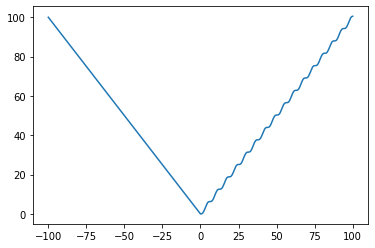

In [55]:
xs = np.linspace(-100, 100, 1000)
ys = list(map(f, xs))

plt.plot(xs, ys)
plt.show()

[1.13008004e-05] [2.4053364e-16]
{'gradient_call_count': 89, 'function_call_count': 90, 'points': array([[-1.98741789e+01,  1.98741789e+01],
       [-1.93741819e+01,  1.93741819e+01],
       [-1.88741849e+01,  1.88741849e+01],
       [-1.83741879e+01,  1.83741879e+01],
       [-1.78741909e+01,  1.78741909e+01],
       [-1.73741938e+01,  1.73741938e+01],
       [-1.68741968e+01,  1.68741968e+01],
       [-1.63741998e+01,  1.63741998e+01],
       [-1.58742028e+01,  1.58742028e+01],
       [-1.53742058e+01,  1.53742058e+01],
       [-1.48742087e+01,  1.48742087e+01],
       [-1.43742117e+01,  1.43742117e+01],
       [-1.38742147e+01,  1.38742147e+01],
       [-1.33742177e+01,  1.33742177e+01],
       [-1.28742207e+01,  1.28742207e+01],
       [-1.23742236e+01,  1.23742236e+01],
       [-1.18742266e+01,  1.18742266e+01],
       [-1.13742296e+01,  1.13742296e+01],
       [-1.08742326e+01,  1.08742326e+01],
       [-1.03742356e+01,  1.03742356e+01],
       [-9.87423854e+00,  9.87423854e+00],

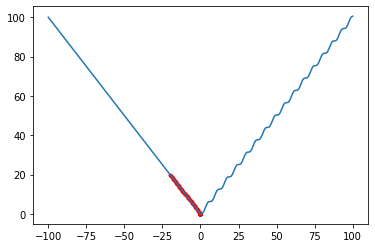

In [56]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (x, y), meta = gradient_descent(f, 1, coord_relaxer=LinearCoordRelaxer(f, alpha=5, eps=1e-5))
    print(x, y)
    print(meta)

    plt.plot(meta["points"][:, 0], meta["points"][:, 1], 'r.')
    plt.plot(xs, ys)
    plt.show()